In [7]:
import pandas as pd
file_path = r"C:\Users\palak\OneDrive\Desktop\E-commerce Project\ecommerce_dataset.xlsx"

In [12]:
customers_df = pd.read_excel(file_path, sheet_name="customers")
orders_df = pd.read_excel(file_path, sheet_name="orders")
products_df = pd.read_excel(file_path, sheet_name="products")

orders_customers = pd.merge(orders_df, customers_df, on="customer_id", how="left")
master_df = pd.merge(orders_customers, products_df, on="product_id", how="left")

print("Master dataset shape:", master_df.shape)
print(master_df.head())
master_df.to_csv("master_dataset.csv", index=False)

Master dataset shape: (200, 15)
   order_id  customer_id  product_id  quantity  order_date  price_x  \
0         1           49          17         2  2022-11-11  3449.47   
1         2            9          16         3  2022-01-16  4401.48   
2         3           14           3         5  2023-01-29  3935.54   
3         4            9           1         3  2023-04-26  1737.03   
4         5           14           4         3  2022-08-17  2242.37   

   total_value customer_name                   email region signup_date  \
0      6898.94   Customer 49  customer49@example.com   West  2023-02-18   
1     13204.44    Customer 9   customer9@example.com   East  2022-04-22   
2     19677.70   Customer 14  customer14@example.com   East  2022-10-07   
3      5211.09    Customer 9   customer9@example.com   East  2022-04-22   
4      6727.11   Customer 14  customer14@example.com   East  2022-10-07   

      Month product_name         category  price_y  
0  2023-Feb   Product 17  Home Applia

In [14]:
import os
print(os.getcwd())

C:\Users\palak


In [17]:
# Handling Missing Values

In [16]:
print(master_df.isnull().sum())

order_id         0
customer_id      0
product_id       0
quantity         0
order_date       0
price_x          0
total_value      0
customer_name    0
email            0
region           0
signup_date      0
Month            0
product_name     0
category         0
price_y          0
dtype: int64


In [18]:
master_df["quantity"] = master_df["quantity"].fillna(0)

master_df["customer_name"] = master_df["customer_name"].fillna("Unknown")

master_df = master_df.dropna(how="all")

In [1]:
# Removing Duplicates

In [20]:
print("Duplicates : ",master_df.duplicated().sum())

Duplicates :  0


In [22]:
# Standardizing text 

In [28]:
master_df["product_name"]=master_df["product_name"].str.strip().str.lower()

In [34]:
master_df.head()

,order_id,customer_id,product_id,quantity,order_date,price_x,total_value,customer_name,email,region,signup_date,Month,product_name,category,price_y
0,1,49,17,2,2022-11-11,3449.47,6898.94,Customer 49,customer49@example.com,West,2023-02-18,2023-Feb,product 17,Home Appliances,3449.47
1,2,9,16,3,2022-01-16,4401.48,13204.44,Customer 9,customer9@example.com,East,2022-04-22,2022-Apr,product 16,Accessories,4401.48
2,3,14,3,5,2023-01-29,3935.54,19677.70,Customer 14,customer14@example.com,East,2022-10-07,2022-Oct,product 3,Accessories,3935.54
3,4,9,1,3,2023-04-26,1737.03,5211.09,Customer 9,customer9@example.com,East,2022-04-22,2022-Apr,product 1,Accessories,1737.03
4,5,14,4,3,2022-08-17,2242.37,6727.11,Customer 14,customer14@example.com,East,2022-10-07,2022-Oct,product 4,Home Appliances,2242.37


In [44]:
print(master_df.dtypes)

order_id                  int64
customer_id               int64
product_id                int64
quantity                  int32
order_date       datetime64[ns]
price_x                 float64
total_value             float64
customer_name            object
email                    object
region                   object
signup_date      datetime64[ns]
Month                    object
product_name             object
category                 object
price_y                 float64
dtype: object


In [48]:
master_df["order_date"]=pd.to_datetime(master_df["order_date"])
master_df["quantity"] = master_df["quantity"].astype(int)

In [50]:
# Drop price_y column

In [52]:
master_df=master_df.drop("price_y",axis=1)

In [54]:
master_df.dtypes

order_id                  int64
customer_id               int64
product_id                int64
quantity                  int32
order_date       datetime64[ns]
price_x                 float64
total_value             float64
customer_name            object
email                    object
region                   object
signup_date      datetime64[ns]
Month                    object
product_name             object
category                 object
dtype: object

In [56]:
# Monthly Sales Trend 

In [64]:
sales_trend=master_df.groupby(master_df["order_date"].dt.to_period("M"))["total_value"].sum()

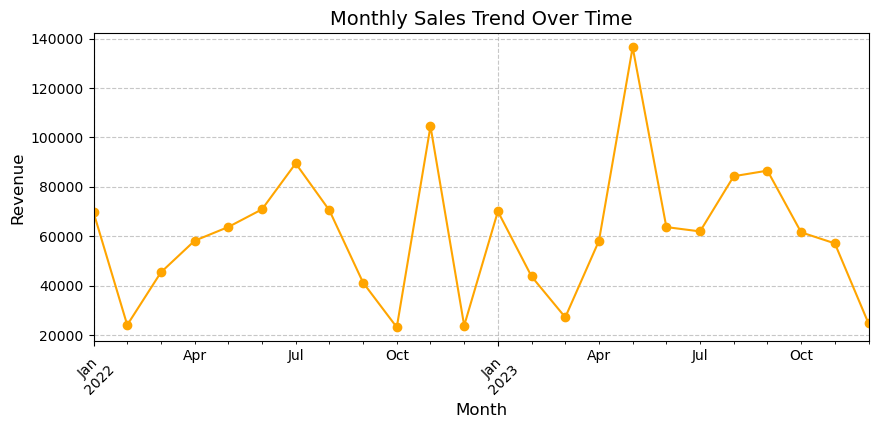

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sales_trend.plot(kind="line", marker="o", color="orange")

plt.title("Monthly Sales Trend Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [116]:
# Category-wise Distribution

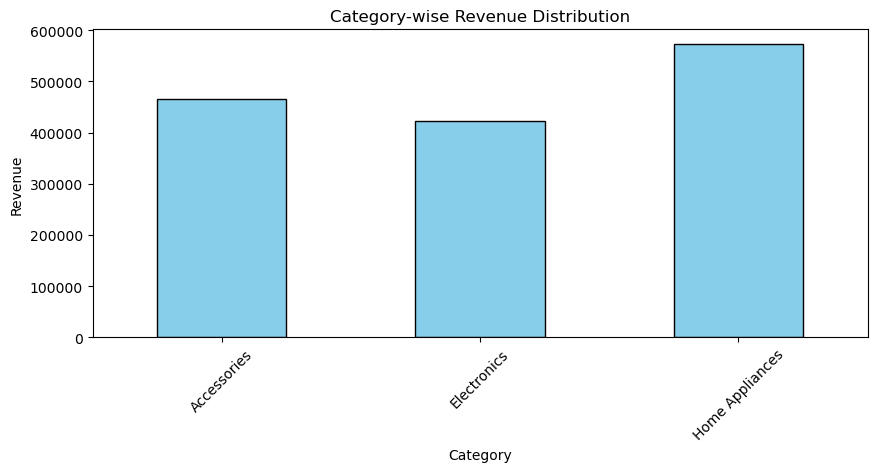

In [130]:
category_dist = master_df.groupby("category")["total_value"].sum()

plt.figure(figsize=(10,4))
category_dist.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Category-wise Revenue Distribution")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [134]:
# Revenue by Region

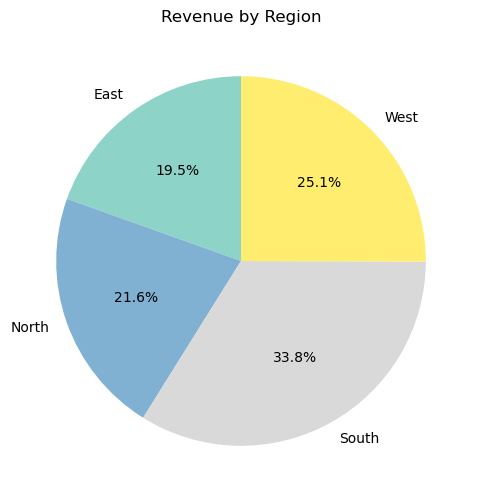

In [142]:
region_rev = master_df.groupby("region")["total_value"].sum()

plt.figure(figsize=(6,6))
region_rev.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Set3")
plt.title("Revenue by Region")
plt.ylabel("")
plt.show()

In [ ]:
data=